#### Análisis y Procesamiento de Señales

# Tarea Semanal N°2
## *Sistemas Lineales e Invariantes en el Tiempo*

#### Augusto Colugnatti

## Introducción teórica

Un sistema lineal e invariante en el tiempo es un modelo matemático, descrito en forma de ecuación, que toma una señal o variable de entrada, la procesa a través de una serie de instrucciones, procesos, y la devuelve como una señal de salida. Para considerarse un sistema LTI propiamente dicho, este debe cumplir con dos propiedades, que como su nombre lo indica, son la linealidad y la invariancia en el tiempo. ¿Qué significa esto?
#### Linealidad
El sistema representa una suerte de proporción entre la entrada y la salida. Algebráicamente, esto implica que las únicas operaciones que realiza el sistema sobre la señal de entrada son el producto por escalar y la aditividad entre sus muestras.
#### Invariancia en el tiempo 
El sistema responde de la misma manera sin importar el momento en que se utilice. Es decir, ante una entrada repetida 'x', se espera de forma consistente que la salida del sistema sea siempre 'y', incluso cuando las condiciones del entorno hayan cambiado.

Como ya se mencionó, el medio para describir estos sistemas es una ecuación, específicamente una ecuación en diferencias. Estos modelos buscan operar a la señal con su propia información, calculando de manera secuencial los valores de la salida. Para ello se realizan operaciones lineales entre las componentes ya calculadas y muestras restrasadas de la señal de entrada, obteniéndose siempre una expresión de la pinta

\begin{equation}
y[n] = \sum_{k=0}^{M} b_k \cdot x[n-k] - \sum_{k=1}^{N} a_k \cdot y[n-k]
\end{equation}

Observar que lo términos que no aportan (o no quiero que aporten) información a la componente de salida pueden ser anulados simplemente asignando $ a_k = 0 $ o bien $ b_k = 0 $.

Otro concepto importante que interesa definir es la respuesta al impulso. Básicamente es la salida de un sistema LTI cuando la entrada corresponde a un impulso, o en nuestro caso, a una delta. Contar con la respuesta al impulso 'h' es especialmente útil, pues me permite calcular la respuesta de cualquier otra entrada para dicho sistema mediante el siguiente producto de convolución

\begin{equation}
y[n] = x[n] * h[n]
\end{equation}

lo que en el dominio de la frecuencia se traduce en un simple producto 

\begin{equation}
Y[k] = X[k] \cdot H[k]
\end{equation}

## Desarrollo
#### *Definiciones y preparación del entorno*

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sp

def eje_temporal (N, fs):
    
    # Resolución espectral = fs / N
    # t_final siempre va a ser 1/Res. espec.
    Ts = 1/fs
    t_final = N * Ts # su inversa es la resolución espectral
    tt = np.arange (0, t_final, Ts) # defino una sucesión de valores para el tiempo
    return tt

def func_senoidal (tt, frec, amp, fase, v_medio):
    
    xx = amp * np.sin (2 * np.pi * frec * tt + fase) + v_medio # tt es un vector, por ende la función sin se evalúa para cada punto del mismo
    # xx tendrá la misma dimensión que tt
    return xx

def LTI_1 (x):
    
    N = len(x)
    y = np.zeros (N)
    y[0] = 0.03*x[0]
    y[1] = 0.03*x[1] + 0.05*x[0] + 1.5*y[0]
    for n in np.arange (2, N, 1):
        y[n] = 0.03*x[n] + 0.05*x[n-1] + 0.03*x[n-2] + 1.5*y[n-1] - 0.5*y[n-2]
    return y

def LTI_2 (x):
    
    N = len(x)
    y = np.zeros (N)
    for k in np.arange (0, 9, 1):
        y[k] = x[k]
    for n in np.arange (10, N, 1):
        y[n] = x[n] + 3*x[n-10]
    return y

def LTI_3 (x):
    
    N = len(x)
    y = np.zeros (N)
    for k in np.arange (0, 9, 1):
        y[k] = x[k]
    for n in np.arange (10, N, 1):
        y[n] = x[n] + 3*y[n-10]
    return y
        
### Inicializo variables ###

amplitud = 0
frec = 0
fase = 0
v_medio = 0
N = 500
fs = 100000
df = fs/N

tt = eje_temporal (N, fs)
ff = np.arange (N) * df

print ("\nSe toman 500 muestras con una frecuencia de muestreo de 100KHz para todas las señales \n")


Se toman 500 muestras con una frecuencia de muestreo de 100KHz para todas las señales 



#### 1) *Trabajando con un sistema LTI*

In [15]:
### Respuesta al impulso de LTI_1 ###

I = np.zeros (len(np.arange(N)))
I[0] = 1 # de esta manera genero una delta en n=0

h_1 = LTI_1 (x = I)
# con la respuesta al impulso, puedo hallar la salida del sistema para una señal x simplemente como y=x*h (*: prod. de convolución)

Señal 1: potencia de entrada -> 0.5000000000000001 [magnitud]/seg
         potencia de salida  -> 4.531694852283608 [magnitud]/seg



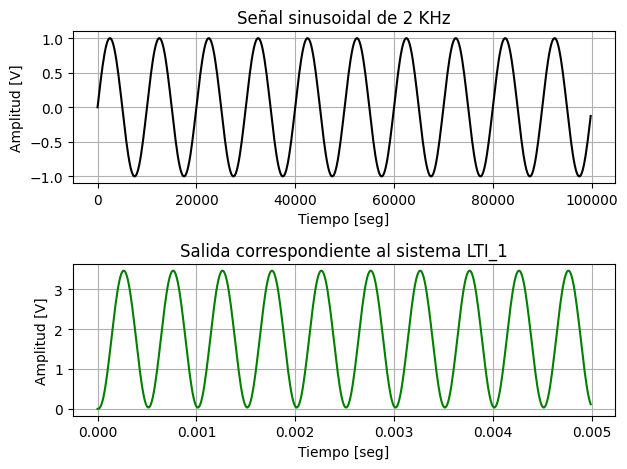

In [16]:
### Señal 1 ###

ss_1 = func_senoidal (tt = tt, frec = 2000, amp = 1, fase = 0, v_medio = 0)
y_1 = LTI_1 (x = ss_1)
# Es una buena práctica explicitar los parámetros que se pasan a la función

plt.figure (1)

plt.subplot (2, 1, 1)
plt.plot (ff, ss_1, color='black')
plt.title ("Señal sinusoidal de 2 KHz")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.subplot (2, 1, 2)
plt.plot (tt, y_1, color='green')
plt.title ("Salida correspondiente al sistema LTI_1")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.tight_layout ()
print ("Señal 1: potencia de entrada ->", np.sum (ss_1**2)/N, "[magnitud]/seg")
print ("         potencia de salida  ->", np.sum (y_1**2)/N, "[magnitud]/seg")
print ()

Señal 2: potencia de entrada -> 49.999999999999986 [magnitud]/seg
         potencia de salida  -> 148.70712329627355 [magnitud]/seg



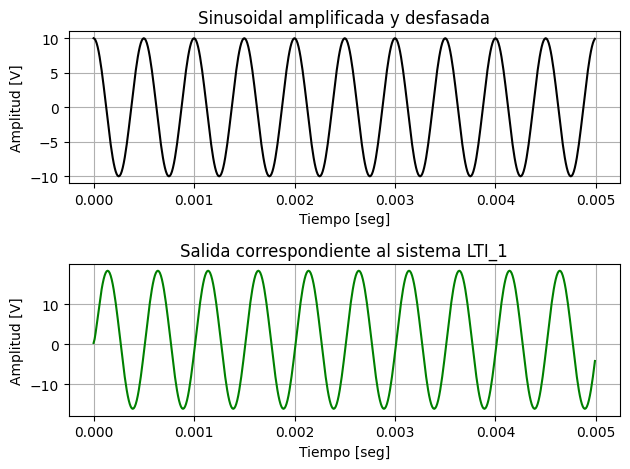

In [17]:
### Señal 2 ###

ss_2 = func_senoidal (tt = tt, frec = 2000, amp = 10, fase = np.pi/2, v_medio = 0)
y_2 = LTI_1 (x = ss_2)

plt.figure (2)

plt.subplot (2, 1, 1)
plt.plot (tt, ss_2, color='black')
plt.title ("Sinusoidal amplificada y desfasada")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.subplot (2, 1, 2)
plt.plot (tt, y_2, color='green')
plt.title ("Salida correspondiente al sistema LTI_1")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.tight_layout ()
print ("Señal 2: potencia de entrada ->", np.sum (ss_2**2)/N, "[magnitud]/seg")
print ("         potencia de salida  ->", np.sum (y_2**2)/N, "[magnitud]/seg")
print ()

Señal 3: potencia de entrada -> 25.0 [magnitud]/seg
         potencia de salida  -> 168.63816924482902 [magnitud]/seg



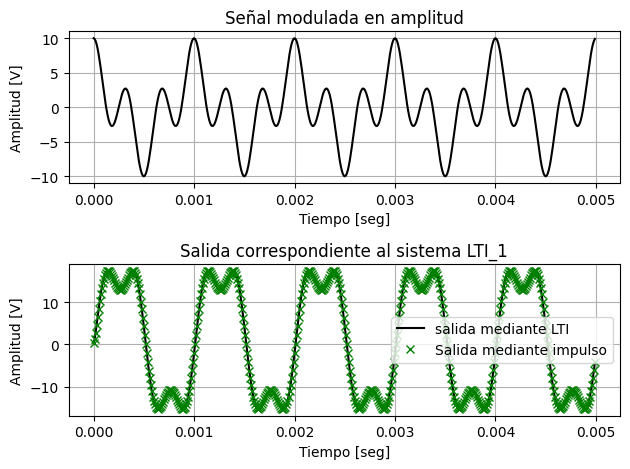

In [18]:
### Señal 3 ###

moduladora = func_senoidal (tt = tt, frec = 1000, amp = 1, fase = np.pi/2, v_medio = 0)
ss_3 = moduladora * ss_2
y_3 = LTI_1 (x = ss_3)

yy_3 = np.convolve (ss_3, h_1, mode='full')
yy_3 = yy_3 [:len(ss_3)]
# la longitud de yy_3 al convolucionar por "full" es de len(ss_3) + len(h_1) - 1
# por lo tanto, trunco el resultado con la longitud de ss_3 para graficar

plt.figure (3)

plt.subplot (2, 1, 1)
plt.plot (tt, ss_3, color='black')
plt.title ("Señal modulada en amplitud")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.subplot (2, 1, 2)
plt.plot (tt, y_3, color='black', label='salida mediante LTI')
plt.plot (tt, yy_3, linestyle='', marker='x', color='green', label='Salida mediante impulso')
plt.title ("Salida correspondiente al sistema LTI_1")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.legend ()
plt.grid (True)

plt.tight_layout ()
print ("Señal 3: potencia de entrada ->", np.sum (ss_3**2)/N, "[magnitud]/seg")
print ("         potencia de salida  ->", np.sum (y_3**2)/N, "[magnitud]/seg")
print ()

Señal 4: potencia de entrada -> 0.3707402889009135 [magnitud]/seg
         potencia de salida  -> 3.4497555048259647 [magnitud]/seg



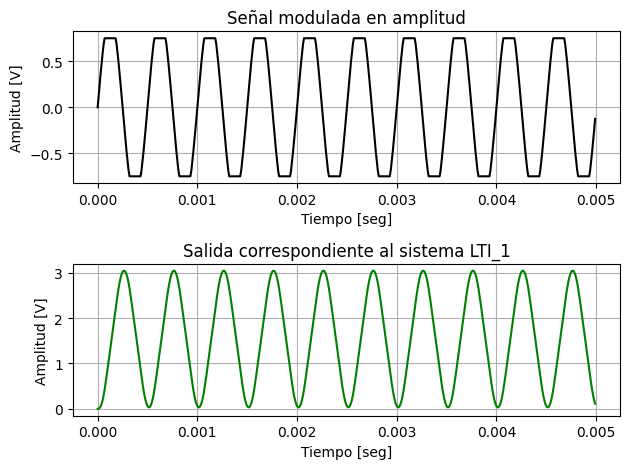

In [19]:
### Señal 4 ###

recorte = 0.75
ss_4 = np.clip (ss_1, -recorte, recorte)
y_4 = LTI_1 (x = ss_4)

plt.figure (4)

plt.subplot (2, 1, 1)
plt.plot (tt, ss_4, color='black')
plt.title ("Señal modulada en amplitud")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.subplot (2, 1, 2)
plt.plot (tt, y_4, color='green')
plt.title ("Salida correspondiente al sistema LTI_1")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.tight_layout ()
print ("Señal 4: potencia de entrada ->", np.sum (ss_4**2)/N, "[magnitud]/seg")
print ("         potencia de salida  ->", np.sum (y_4**2)/N, "[magnitud]/seg")
print ()

Señal 5: potencia de entrada -> 1.0 [magnitud]/seg
         potencia de salida  -> 14.854601605743287 [magnitud]/seg



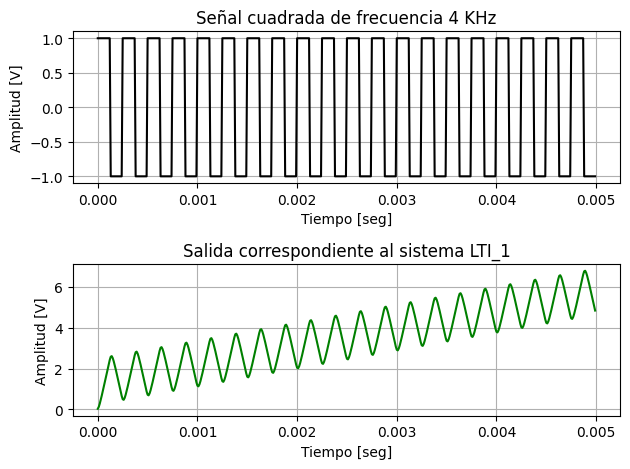

In [20]:
### Señal 5 ###

ss_5 = sp.square (2 * np.pi * 4000 * tt)
y_5 = LTI_1 (x = ss_5)

plt.figure (5)

plt.subplot (2, 1, 1)
plt.plot (tt, ss_5, color='black')
plt.title ("Señal cuadrada de frecuencia 4 KHz")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.subplot (2, 1, 2)
plt.plot (tt, y_5, color='green')
plt.title ("Salida correspondiente al sistema LTI_1")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.tight_layout ()
print ("Señal 5: potencia de entrada ->", np.sum (ss_5**2)/N, "[magnitud]/seg")
print ("         potencia de salida  ->", np.sum (y_5**2)/N, "[magnitud]/seg")
print ()

Señal 6: potencia de entrada -> 1.0 [magnitud]/seg
         potencia de salida  -> 3997.1383666667743 [magnitud]/seg



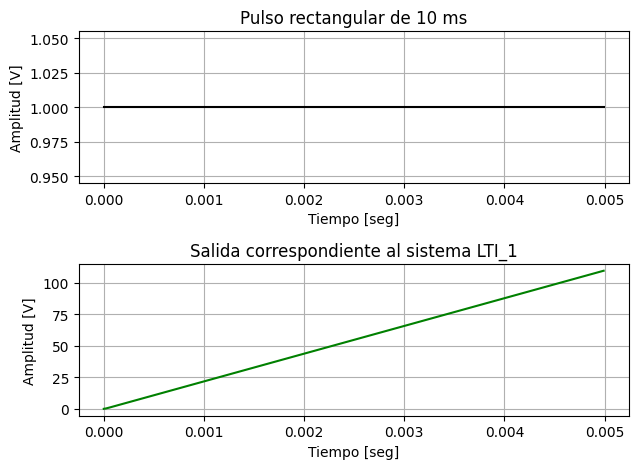

In [21]:
### Señal 6 ###

pulso = np.zeros (len(tt))
duracion = 0.01
flanco_subida = 0
flanco_bajada = flanco_subida + duracion

pulso [(tt >= flanco_subida) & (tt <= flanco_bajada)] = 1
# esto hace que el vector tome el valor 1 para los índices que cumplen la condición que figura entre []
y_6 = LTI_1 (x = pulso)

plt.figure (6)

plt.subplot (2, 1, 1)
plt.plot (tt, pulso, color='black')
plt.title ("Pulso rectangular de 10 ms")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.subplot (2, 1, 2)
plt.plot (tt, y_6, color='green')
plt.title ("Salida correspondiente al sistema LTI_1")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.tight_layout ()
print ("Señal 6: potencia de entrada ->", np.sum (pulso**2)/N, "[magnitud]/seg")
print ("         potencia de salida  ->", np.sum (y_6**2)/N, "[magnitud]/seg")
print ()

#### 2) *Respuesta al impulso de sistemas LTI y cálculo de salidas*

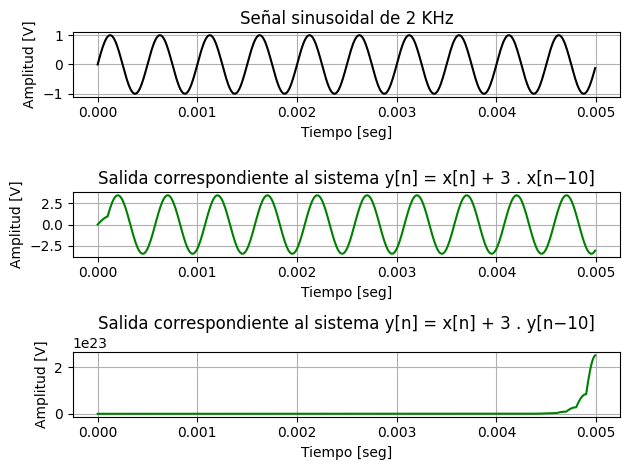

In [24]:
### Respuestas al impulso de LTI_2 y LTI_3 ###

h_2 = LTI_2 (x = I)
h_3 = LTI_3 (x = I)
# calculo la respuesta al impulso de ambos sistemas

y_2 = np.convolve (ss_1, h_2, mode='full')
y_3 = np.convolve (ss_1, h_3, mode='full')
# calculo la salida de cada sistema de la señal 1 convolucionando con la correspondiente respuesta al impulso

y_2 = y_2 [:len(ss_1)]
y_3 = y_3 [:len(ss_1)]
# trunco los resultados al tamaño del vector ss_1

plt.figure (7)

plt.subplot (3, 1, 1)
plt.plot (tt, ss_1, color='black')
plt.title ("Señal sinusoidal de 2 KHz")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.subplot (3, 1, 2)
plt.plot (tt, y_2, color='green')
plt.title ("Salida correspondiente al sistema y[n] = x[n] + 3 . x[n−10]")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.subplot (3, 1, 3)
plt.plot (tt, y_3, color='green')
plt.title ("Salida correspondiente al sistema y[n] = x[n] + 3 . y[n−10]")
plt.xlabel ("Tiempo [seg]")
plt.ylabel ("Amplitud [V]")
plt.grid (True)

plt.tight_layout ()

## Conclusiones
Para trabajar con los sistemas presentados se asumió la causalidad en todas las señales, es decir, que el valor de ellas es cero para todo tiempo  negativo. En una primera instancia, se calcularon las respuestas al sistema LTI_1 (en tiempo) de las señales generadas en la TS1. Uno de los resultados a destacar corresponde al de la señal 3, pues se compararon dos métodos para hallar su respuesta. El método por defecto, aplicado al resto de casos, consiste simplemente en pasar la señal de entrada como parámetro a la función que define nuestro sistema, la cual toma ciertas muestras de la señal, se retroalimenta (o no), y devuelve el vector de salida. Sin embargo, como se vio en la introducción teórica, existe otra posibilidad y es convolucionar a la señal por la respuesta al impulso del sistema. Para buscar esta última se debe entrar a la función con una delta. Como era de esperar, al graficar ambas salidas se observó la superposición de todos sus valores, verificando así la ecuación (2).

Para la segunda parte se tomó como objeto de estudio únicamente a la señal 1. Se calculó su respuesta en tiempo para los sistemas LTI_2 y LTI_3 mediante la convolución de la señal con la correspondiente respuesta al impulso. En el primero de ellos, no existe retroalimentación alguna del sistema, esto es, los valores de salida anteriores no interfieren en los cálculos, y los únicos parámetros que interesan son las muestras de la señal de entrada. Como resultado, se observa una señal del mismo tipo, senoidal, amplificada. Sin embargo, el segundo sistema sí cuenta con retroalimentación, una suerte de "memoria" de las salidas pasadas. Esto dificulta en gran medida preveer el resultado de la respuesta al impulso. Lo que sí es esperable en este caso, es que a mayor cantidad de muestras, la respuesta tienda a infinito, manifestando así que el sistema es de tipo inestable.

## Autoevaluación del aprendizaje
Con respecto a la TS1, me siento más cómodo con la sintaxis de Python y manejos en general. Por otro lado, resolví la tarea con seguridad, pero siento que estoy muy flojo de contexto como para sacar conclusiones fuertes sobre los sistemas. Estuve mirando la bibliografía y entiendo que está muy relacionado con el diseño de filtros, pero poco puedo concluir yo mismo con lo que veo en los resultados, me gustaría profundizarlo en clase si es posible.